# penguins_tvae stacking

Training on penguins dataset using tvae model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declare real dataset and split into train/test

In [2]:
# Read penguins data
penguins_real = pd.read_csv("Data\penguins_size.csv")
penguins_real = penguins_real.dropna()
gen_method = "tvae"
target = "species"

In [3]:
# Split penguins data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_real, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv("Data\penguins_train.csv", index=False)
penguins_test.to_csv("Data\penguins_test.csv", index=False)

In [3]:
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = penguins_real.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v1.csv", key="synth")

[2024-05-06T20:12:06.158274+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 50%|█████     | 500/1000 [01:14<01:14,  6.70it/s]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Gentoo     Biscoe              40.9             13.7   
1       Adelie      Dream              37.3             17.8   
2       Gentoo     Biscoe              50.0             15.9   
3       Adelie     Biscoe              35.9             19.2   
4       Adelie     Biscoe              40.5             18.9   
..         ...        ...               ...              ...   
262  Chinstrap      Dream              50.9             19.1   
263     Adelie  Torgersen              37.2             19.4   
264     Adelie     Biscoe              39.7             17.7   
265     Gentoo     Biscoe              45.5             15.0   
266     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
0                214.0       4650.0  FEMALE  
1                191.0       3350.0  FEMALE  
2                224.0       5350.0    MALE  
3                189.0       3800.0 

# syn_v2

In [6]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate real and synthesized data
penguins_stack = pd.concat([penguins_real, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v1.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v1_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v1_test.csv", index=False)

In [7]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v2.csv", key="synth")

[2024-05-06T20:15:16.019709+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 50%|█████     | 500/1000 [02:06<02:06,  3.94it/s]


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
235     Gentoo     Biscoe              45.1             14.5   
399  Chinstrap      Dream              49.8             18.9   
602     Adelie      Dream              41.5             17.5   
61      Adelie     Biscoe              41.1             19.1   
145     Adelie      Dream              41.5             18.5   
..         ...        ...               ...              ...   
71      Adelie  Torgersen              37.2             19.4   
106     Adelie     Biscoe              39.7             17.7   
270     Gentoo     Biscoe              45.5             15.0   
435     Gentoo     Biscoe              36.0             14.8   
102     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
235              215.0       5000.0  FEMALE  
399              196.2       3932.8    MALE  
602              189.7       3862.2    MALE  
61               188.0       4100.0 

# syn_v3

In [8]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v2.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v2_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v2_test.csv", index=False)

In [9]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v3.csv", key="synth")

[2024-05-06T20:19:22.915489+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 45%|████▌     | 450/1000 [03:16<03:59,  2.29it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1112     Adelie      Dream              56.7             18.1   
966      Gentoo  Torgersen              49.7             18.4   
598      Adelie     Biscoe              38.2             19.0   
170   Chinstrap      Dream              46.7             17.9   
275      Gentoo     Biscoe              45.7             13.9   
...         ...        ...               ...              ...   
1095     Adelie      Dream              48.4             17.9   
1130     Adelie     Biscoe              41.4             18.3   
1294     Gentoo     Biscoe              49.2             14.8   
860      Gentoo     Biscoe              49.2             18.1   
1126     Adelie      Dream              42.4             18.2   

      flipper_length_mm  body_mass_g     sex  
1112              193.3       3651.7    MALE  
966               223.5       5270.5  FEMALE  
598               193.2       3603.7    MALE  
170               19

# syn_v4

In [10]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v3.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v3_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v3_test.csv", index=False)

In [11]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v4.csv", key="synth")

[2024-05-06T20:22:39.988100+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 75%|███████▌  | 750/1000 [11:21<03:47,  1.10it/s]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1011     Gentoo  Torgersen              39.5             18.7   
1273  Chinstrap      Dream              46.5             17.8   
69       Adelie  Torgersen              42.8             18.5   
2539  Chinstrap      Dream              48.5             18.3   
942      Gentoo     Biscoe              46.1             17.7   
...         ...        ...               ...              ...   
1638  Chinstrap     Biscoe              40.5             15.3   
1095     Adelie      Dream              48.4             17.9   
1130     Adelie     Biscoe              41.4             18.3   
1294     Gentoo     Biscoe              49.2             14.8   
860      Gentoo     Biscoe              49.2             18.1   

      flipper_length_mm  body_mass_g     sex  
1011              193.6       4969.7  FEMALE  
1273              189.3       3492.0  FEMALE  
69                195.0       4250.0    MALE  
2539              19

# syn_v5

In [12]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v4.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v4_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v4_test.csv", index=False)

In [13]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v5.csv", key="synth")

[2024-05-06T20:34:02.624666+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 75%|███████▌  | 750/1000 [22:23<07:27,  1.79s/it]


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
5054     Adelie     Biscoe              48.6             17.9   
120      Adelie  Torgersen              38.8             17.6   
2351     Adelie      Dream              41.2             18.6   
1907     Gentoo     Biscoe              39.1             18.3   
3648     Gentoo     Biscoe              48.6             18.5   
...         ...        ...               ...              ...   
3092     Adelie     Biscoe              49.3             18.4   
3772     Adelie      Dream              37.0             18.3   
5191     Gentoo      Dream              49.0             15.0   
5226  Chinstrap      Dream              49.8             18.1   
860      Gentoo     Biscoe              49.2             18.1   

      flipper_length_mm  body_mass_g     sex  
5054              193.7       3539.3  FEMALE  
120               191.0       3275.0  FEMALE  
2351              219.4       5286.0    MALE  
1907              21

# stack_v5 - Final stack

In [14]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v5.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v5_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [15]:
# Train stack_v5 and save as state
state_stack_v5 = Load(penguins_train).Train(plugin=gen_method)

[2024-05-06T20:56:28.055485+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 80%|████████  | 800/1000 [1:14:14<18:33,  5.57s/it]   


# stack_v5 (synth only)

In [16]:
# Remove the first 334 rows, equal to the real data, from stack_v5
penguins_stack_synth_only = penguins_stack.iloc[334:, :]

# Save to csv
penguins_stack_synth_only.to_csv(f"{gen_method}\penguins_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_synth_only_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [17]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(penguins_train).Train(plugin=gen_method)

[2024-05-06T22:10:44.510385+0200][9256][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 90%|█████████ | 900/1000 [1:08:46<07:38,  4.58s/it]  


# Generate synth data based on stack_v5

In [18]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':       species     island  culmen_length_mm  culmen_depth_mm  \
9876   Adelie     Biscoe              40.4             18.4   
10068  Gentoo     Biscoe              39.4             18.1   
10316  Adelie      Dream              49.3             18.5   
8622   Adelie  Torgersen              39.2             18.6   
8994   Adelie     Biscoe              40.3             15.1   
...       ...        ...               ...              ...   
5734   Adelie      Dream              39.4             18.1   
5191   Gentoo      Dream              49.0             15.0   
5390   Adelie      Dream              49.1             18.0   
860    Gentoo     Biscoe              49.2             18.1   
7270   Adelie      Dream              40.8             18.4   

       flipper_length_mm  body_mass_g     sex  
9876               194.4       3673.6    MALE  
10068              218.8       3762.3  FEMALE  
10316              222.2       3750.2  FEMALE  
8622               193.8       3811.7   

In [19]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [20]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':       species     island  culmen_length_mm  culmen_depth_mm  \
1381   Adelie     Biscoe              47.1             18.0   
7695   Gentoo     Biscoe              40.1             18.3   
10167  Adelie      Dream              36.2             18.2   
5550   Gentoo      Dream              49.6             18.8   
1100   Adelie  Torgersen              40.7             18.7   
...       ...        ...               ...              ...   
6068   Adelie      Dream              40.4             18.1   
5525   Adelie      Dream              40.3             18.7   
5724   Adelie     Biscoe              46.6             18.0   
1194   Adelie      Dream              39.1             18.6   
7604   Gentoo     Biscoe              38.9             18.0   

       flipper_length_mm  body_mass_g     sex  
1381               192.3       4819.5    MALE  
7695               194.9       3734.6  FEMALE  
10167              191.9       3621.2    MALE  
5550               224.2       3871.8   

In [21]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [4]:
# Read train and test data (this is base/real train and test data, not the stack data)
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Count of penguins_real
real_count = penguins_real.shape[0]

# Read syn_v1 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_real = S.evaluate(penguins_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.040234,0.008365,0.959766,0.008365
1,pca_eigval_diff,u,0.253222,NaN,0.746778,NaN
2,pca_eigvec_ang,u,0.116909,NaN,0.962787,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,2.154705,NaN,0.897395,NaN
5,mutual_inf_diff,u,0.894862,NaN,0.957388,NaN
6,ks_tvd_stat,u,0.160380,0.026729,0.839620,0.026729
7,frac_ks_sigs,u,0.857143,NaN,0.142857,NaN
8,avg_h_dist,u,0.121616,0.089746,0.878384,0.089746
9,avg_pMSE,u,0.009926,0.001286,0.960297,0.005143


# Eval on syn_2

In [5]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v2_sample.csv", index=False)

In [6]:
# Read syn_v2 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v2_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v1 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.023456,0.008397,0.976544,0.008397
1,pca_eigval_diff,u,0.355444,NaN,0.644556,NaN
2,pca_eigvec_ang,u,0.091651,NaN,0.970827,NaN
3,avg_cio,u,0.441826,0.202124,0.441826,0.202124
4,corr_mat_diff,u,2.549279,NaN,0.878606,NaN
5,mutual_inf_diff,u,1.030431,NaN,0.950932,NaN
6,ks_tvd_stat,u,0.157208,0.038993,0.842792,0.038993
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.118098,0.094109,0.881902,0.094109
9,avg_pMSE,u,0.011525,0.001074,0.953901,0.004297


# Eval on syn_3

In [7]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v3_sample.csv", index=False)

In [8]:
# Read syn_v3 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v3_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v2 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.050883,0.008131,0.949117,0.008131
1,pca_eigval_diff,u,0.440960,NaN,0.559040,NaN
2,pca_eigvec_ang,u,0.273779,NaN,0.912853,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,2.853395,NaN,0.864124,NaN
5,mutual_inf_diff,u,1.080672,NaN,0.948539,NaN
6,ks_tvd_stat,u,0.208462,0.046118,0.791538,0.046118
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.121658,0.089287,0.878342,0.089287
9,avg_pMSE,u,0.019840,0.000829,0.920639,0.003317


# Eval on syn_4

In [9]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v4_sample.csv", index=False)

In [10]:
# Read syn_v4 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v4_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v3 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.041043,0.008301,0.958957,0.008301
1,pca_eigval_diff,u,0.331674,NaN,0.668326,NaN
2,pca_eigvec_ang,u,0.136259,NaN,0.956628,NaN
3,avg_cio,u,0.021668,0.017809,0.021668,0.017809
4,corr_mat_diff,u,2.404533,NaN,0.885498,NaN
5,mutual_inf_diff,u,0.963238,NaN,0.954132,NaN
6,ks_tvd_stat,u,0.195250,0.037025,0.804750,0.037025
7,frac_ks_sigs,u,0.857143,NaN,0.142857,NaN
8,avg_h_dist,u,0.117516,0.088328,0.882484,0.088328
9,avg_pMSE,u,0.013737,0.000975,0.945054,0.003902


# Eval on syn_5

In [11]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v5_sample.csv", index=False)

In [12]:
# Read syn_v5 sample
penguins_syn = pd.read_csv(f"{gen_method}\syn_v5_sample.csv")

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v4 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.047600,0.008255,0.952400,0.008255
1,pca_eigval_diff,u,0.394704,NaN,0.605296,NaN
2,pca_eigvec_ang,u,0.028657,NaN,0.990878,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,2.664020,NaN,0.873142,NaN
5,mutual_inf_diff,u,1.008394,NaN,0.951981,NaN
6,ks_tvd_stat,u,0.201023,0.044258,0.798977,0.044258
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.121178,0.090427,0.878822,0.090427
9,avg_pMSE,u,0.014135,0.001469,0.943461,0.005876


# Eval on stack_v5 to real data

In [13]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_v5_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v5 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v5

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.039588,0.008251,0.960412,0.008251
1,pca_eigval_diff,u,0.390747,NaN,0.609253,NaN
2,pca_eigvec_ang,u,0.225772,NaN,0.928135,NaN
3,avg_cio,u,0.143585,0.143585,0.143585,0.143585
4,corr_mat_diff,u,2.669310,NaN,0.872890,NaN
5,mutual_inf_diff,u,1.037136,NaN,0.950613,NaN
6,ks_tvd_stat,u,0.195518,0.045618,0.804482,0.045618
7,frac_ks_sigs,u,0.714286,NaN,0.285714,NaN
8,avg_h_dist,u,0.128243,0.092521,0.871757,0.092521
9,avg_pMSE,u,0.015854,0.001506,0.936585,0.006026


# Eval on stack_synth_only to real data

In [14]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_synth_only_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_synth_only = S.evaluate(penguins_syn,target,"full_eval")
res_stack_synth_only

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.037070,0.008318,0.962930,0.008318
1,pca_eigval_diff,u,0.440898,NaN,0.559102,NaN
2,pca_eigvec_ang,u,0.054831,NaN,0.982547,NaN
3,avg_cio,u,0.019298,0.019298,0.019298,0.019298
4,corr_mat_diff,u,2.777869,NaN,0.867721,NaN
5,mutual_inf_diff,u,1.010559,NaN,0.951878,NaN
6,ks_tvd_stat,u,0.196272,0.036161,0.803728,0.036161
7,frac_ks_sigs,u,0.857143,NaN,0.142857,NaN
8,avg_h_dist,u,0.118808,0.087880,0.881192,0.087880
9,avg_pMSE,u,0.015016,0.002659,0.939934,0.010635


# Multiple plots for evaluation comparisons

In [15]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [16]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_v5, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_v5", "res_stack_synth_only"]

In [17]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

# Save to csv
privacy_plot.to_csv(f"{gen_method}\privacy_plot.csv")

privacy_plot

,eps_identif_risk,att_discl_risk,mia_cls_risk
res_real,0.101124,0.402481,0.764706
res_stack_v1,0.089888,0.384944,0.723529
res_stack_v2,0.029963,0.351155,0.305882
res_stack_v3,0.153558,0.409324,0.682353
res_stack_v4,0.063670,0.384517,0.505882
res_stack_v5,0.142322,0.419162,0.617647
res_stack_synth_only,0.071161,0.321215,0.470588


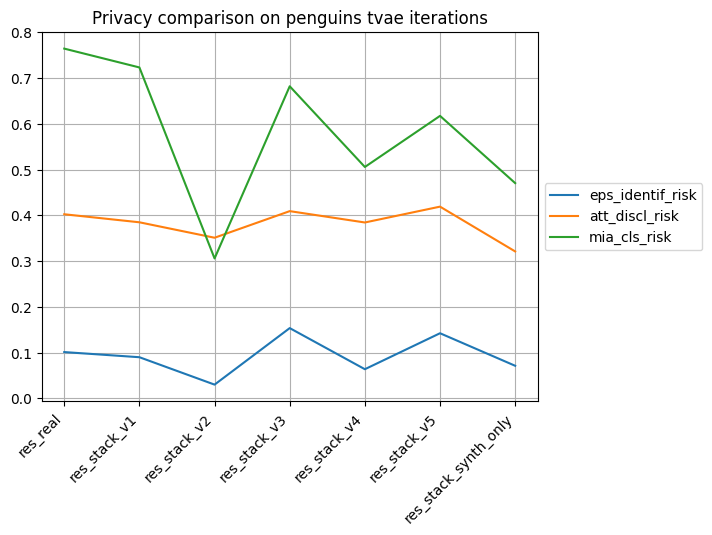

In [18]:
privacy_plot.plot.line()
plt.title("Privacy comparison on penguins tvae iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [19]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

# Save to csv
DCR_plot.to_csv(f"{gen_method}\DCR_plot.csv")

DCR_plot

,median_DCR
res_real,3.234266
res_stack_v1,3.964113
res_stack_v2,5.508596
res_stack_v3,3.682502
res_stack_v4,4.484712
res_stack_v5,4.133288
res_stack_synth_only,5.105651


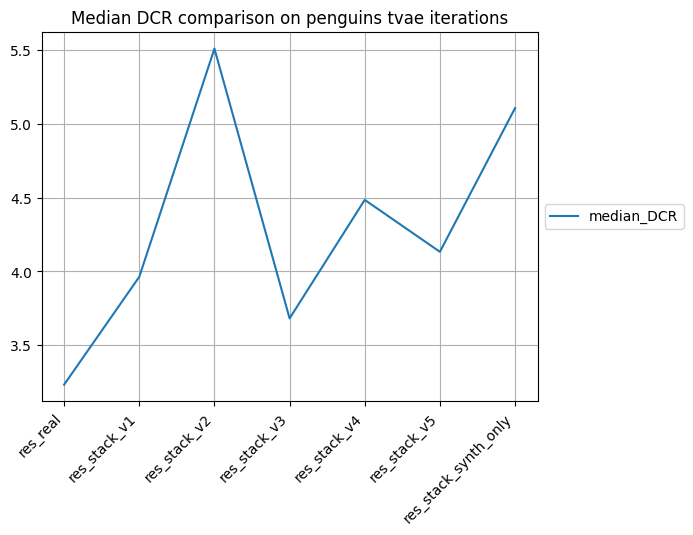

In [20]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on penguins tvae iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [21]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "avg_pMSE",
                                     "cls_F1_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["avg_pMSE", "val"],
                                    evals.loc["cls_F1_diff", "val"]]


utility_plot

,avg_dwm_diff,avg_pMSE,cls_F1_diff
res_real,0.040234,0.009926,0.169147
res_stack_v1,0.023456,0.011525,0.272135
res_stack_v2,0.050883,0.019840,0.287299
res_stack_v3,0.041043,0.013737,0.321139
res_stack_v4,0.047600,0.014135,0.278302
res_stack_v5,0.039588,0.015854,0.230975
res_stack_synth_only,0.037070,0.015016,0.322991


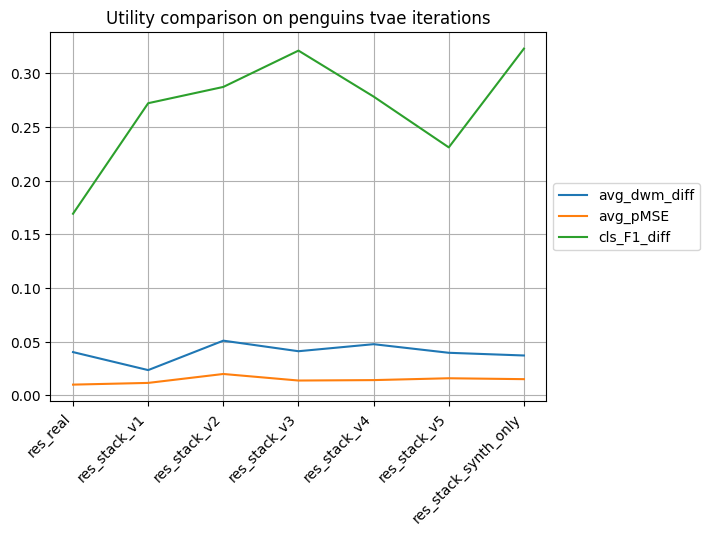

In [22]:
utility_plot.plot.line()
plt.title("Utility comparison on penguins tvae iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [23]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"]]

# Save to csv
matrix_diff_plot.to_csv(f"{gen_method}\matrix_diff_plot.csv", index=False)

matrix_diff_plot

,corr_mat_diff
res_real,2.154705
res_stack_v1,2.549279
res_stack_v2,2.853395
res_stack_v3,2.404533
res_stack_v4,2.664020
res_stack_v5,2.669310
res_stack_synth_only,2.777869


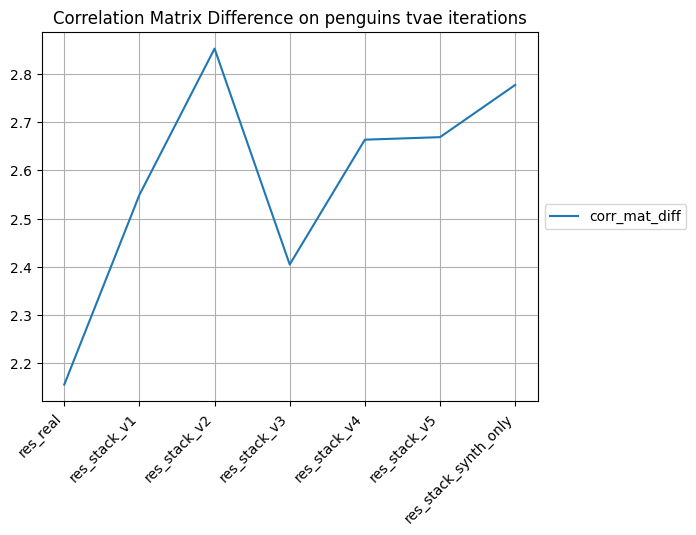

In [24]:
matrix_diff_plot.plot.line()
plt.title("Correlation Matrix Difference on penguins tvae iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [25]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.040234,0.253222,0.116909,0.000000,2.154705,0.894862,0.160380,0.857143,0.121616,0.009926,0.784308,0.036553,0.870097,-0.080545,0.169147,0.182836,0.011236,0.101124,0.764706,0.402481
res_stack_v1,0.023456,0.355444,0.091651,0.441826,2.549279,1.030431,0.157208,0.714286,0.118098,0.011525,0.812642,-0.002574,0.901164,-0.079771,0.272135,0.220149,0.003745,0.089888,0.723529,0.384944
res_stack_v2,0.050883,0.440960,0.273779,0.000000,2.853395,1.080672,0.208462,0.714286,0.121658,0.019840,0.844464,-0.019650,0.962564,-0.106842,0.287299,0.272388,0.000000,0.029963,0.305882,0.351155
res_stack_v3,0.041043,0.331674,0.136259,0.021668,2.404533,0.963238,0.195250,0.857143,0.117516,0.013737,0.827548,-0.040258,0.866710,-0.026661,0.321139,0.231343,0.029963,0.153558,0.682353,0.409324
res_stack_v4,0.047600,0.394704,0.028657,0.000000,2.664020,1.008394,0.201023,0.714286,0.121178,0.014135,0.807416,-0.022530,0.944958,-0.094958,0.278302,0.160448,0.007491,0.063670,0.505882,0.384517
res_stack_v5,0.039588,0.390747,0.225772,0.143585,2.669310,1.037136,0.195518,0.714286,0.128243,0.015854,0.831844,-0.004412,0.883929,-0.040894,0.230975,0.212687,0.022472,0.142322,0.617647,0.419162
res_stack_synth_only,0.037070,0.440898,0.054831,0.019298,2.777869,1.010559,0.196272,0.857143,0.118808,0.015016,0.807136,-0.025456,0.928491,-0.079238,0.322991,0.238806,0.003745,0.071161,0.470588,0.321215


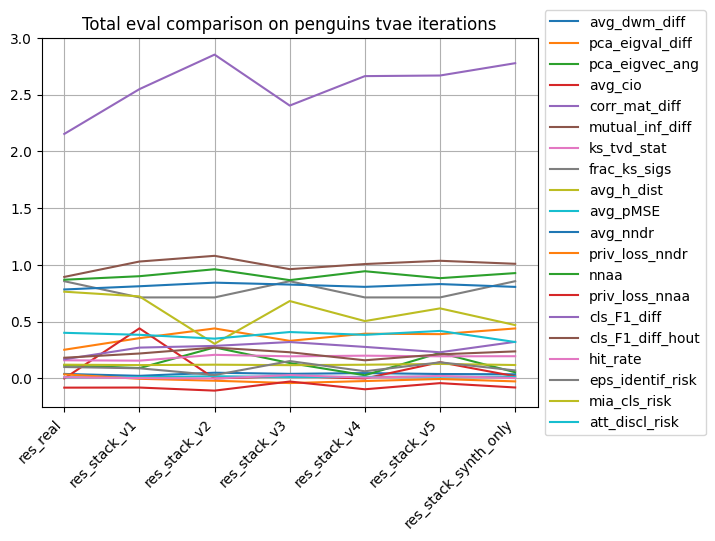

In [26]:
total_eval.plot.line()
plt.title("Total eval comparison on penguins tvae iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [27]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

# Save to csv
overall_res.to_csv(f"{gen_method}\overall_res.csv", index=False)

overall_res

,Stacks,Utility,Privacy
0,res_real,0.701784,0.798071
1,res_stack_v1,0.725704,0.815934
2,res_stack_v2,0.660589,0.878867
3,res_stack_v3,0.677012,0.810521
4,res_stack_v4,0.684382,0.841014
5,res_stack_v5,0.695064,0.823053
6,res_stack_synth_only,0.663146,0.854457


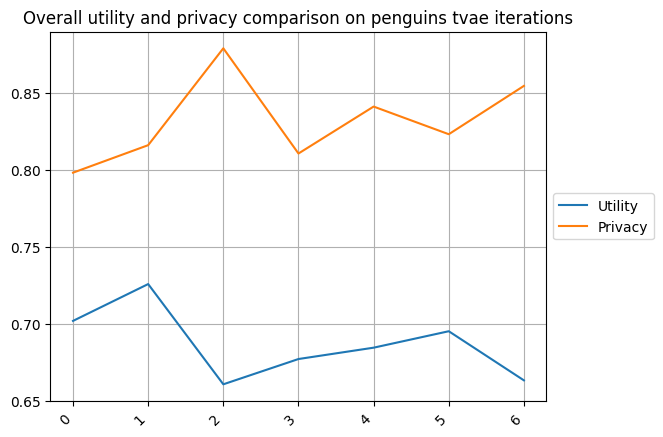

In [28]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on penguins tvae iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()